<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th-OB/blob/Week6/w6_fri_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실전 텍스트 분석: 단어빈도분석, 연관단어분석**

## **1. 단어빈도분석: 문서에서 단어의 출현빈도 계산**

### 1.1. 샘플 데이터 불러오기

In [1]:
# 기사 본문을 저장할 리스트
article_list = []

file_path = "/content/article_sample.txt"

f = open(file_path, encoding='utf-8')
for line in f:
  col = line.strip().split('\t')
  # 기사의 본문만 저장
  content = col[4]
  article_list.append(content)
f.close()

print('총 기사 수:', len(article_list))

총 기사 수: 100


In [2]:
print('기사 샘플:')
print(article_list[3][:1000])

기사 샘플:
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

### 1.2. 기사 문장을 형태소 단위로 분리하기

In [4]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

text = '꼬꼬마 형태소 분석기를 불러옵니다.'
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [5]:
# 형태소 분석 후 기사 단위 형태소 리스트를 저장할 리스트
tag_sentence_list = []

# 불용어 리스트
stop_list = ['카페', '카페규정']

# 형태소 중 꼭 포함해야 하는 형태소 태그
pos_list = ['NNG', 'NNP']

now = 0
for article in article_list:
  now += 1
  print(now, end='\r')
  sentence_list = kkma.sentences(article)
  tag_sentence = []
  for sentence in sentence_list:
    tag_list = kkma.pos(sentence)
    for word, pos in tag_list:
      if (pos in pos_list) and (word not in stop_list) and (len(word)>1):
        tag_sentence.append(word)
  tag_sentence_list.append(tag_sentence)

- `\r`: 캐리지 리턴 = 줄바꿈

### 1.3. 형태소 단위로 출현빈도 카운트하기

In [ ]:
# 단어와 빈도를 쌍으로 저장할 딕셔너리
word_frequency = {}

for tag_sentence in tag_sentence_list:
  for word in tag_sentence:
    # 단어가 word_frequency의 키(key)값에 존재하는 경우 값(value)만 1 더하기
    # 없는 경우 1로 초기화
    if word in word_frequency.keys():
      word_frequency[word] += 1
    else:
      word_frequency[word] = 1

# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬
word_count = []
for word, freq in word_frequency.items():
  word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

# 단어의 빈도 상위 N개 출력
for word, freq in word_count[:20]:
  print(word + '\t' + str(freq))

금융	873
금리	797
비트	554
부동산	519
대출	505
은행	384
기준	265
시장	190
화폐	185
자산	174
투자	170
당국	149
암호	148
신탁	133
그림자	133
기자	130
거래	120
신용	116
관련	107
정부	103


### 1.4. 단어빈도를 활용해 워드클라우드 그리기

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열 생성
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙이기
for tag_sentence in tag_sentence_list:
  # wordcloud 패키지는 연속되는 단어를 하나로 인식
  # 단어를 섞어 단어 단위로 워드클라우드 생성되도록 하기
  # random 패키지의 shuffle(LIST) 함수로 리스트의 순서 섞기
  import random
  random.shuffle(tag_sentence)
  for word in tag_sentence:
    noun_string += word + " "

# 마지막 띄어쓰기 제거
noun_string = noun_string.strip()

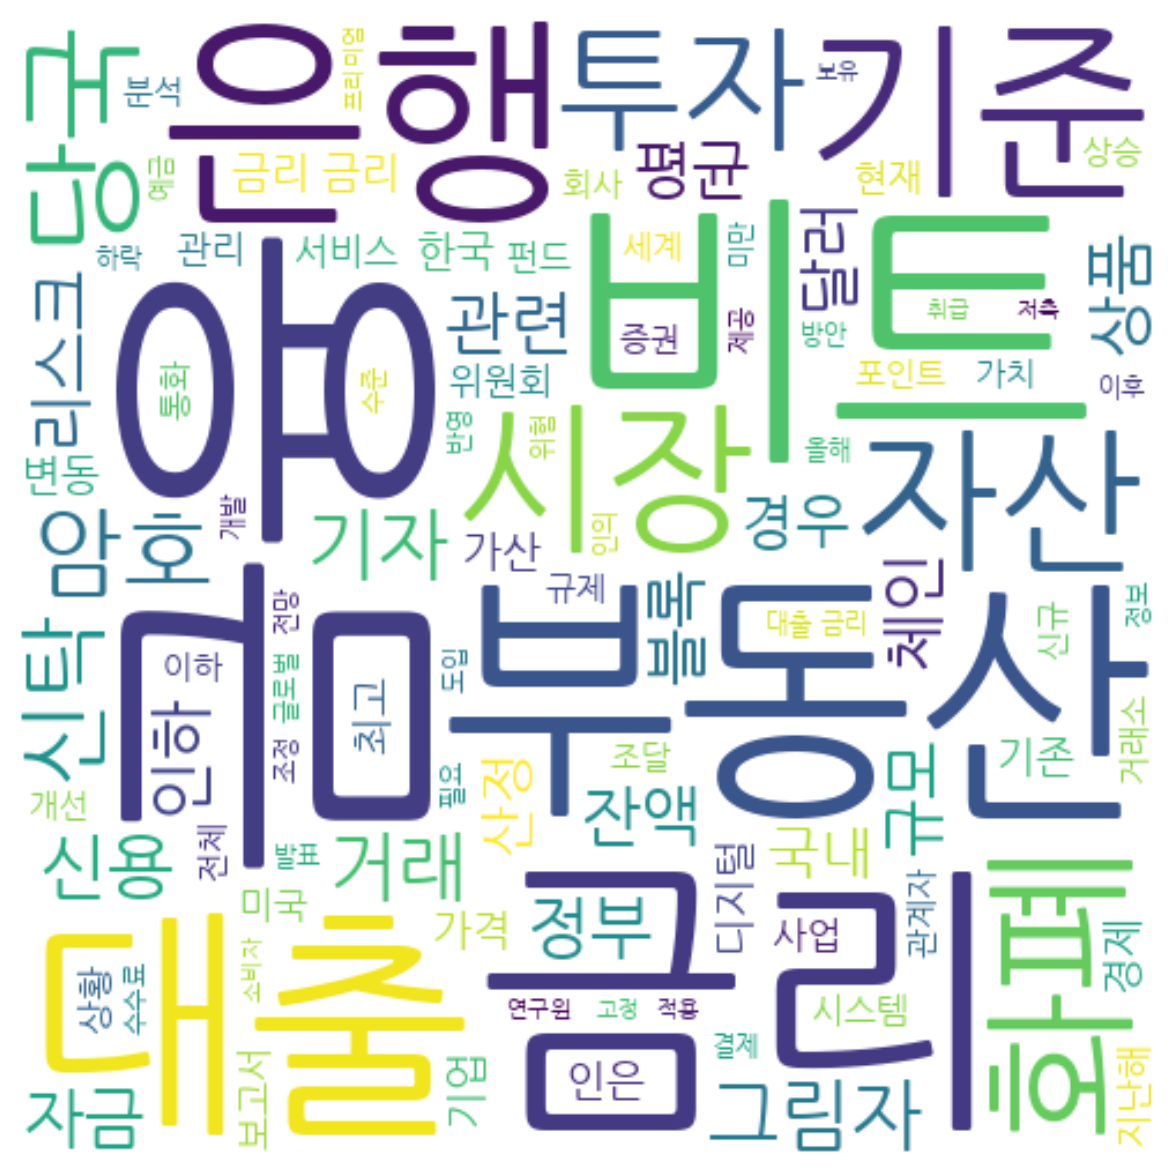

In [25]:
# 워드클라우드 생성 후 파일 저장
# 옵션 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
background_color = 'white'
margin = 10
min_font_size = 10
max_font_size = 150
width = 500
height = 500

wc = WordCloud(font_path = font_path, background_color=background_color, margin=margin,
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## **2. 연관어분석: 문서에서 단어 사이의 동시출현빈도 계산**

### 2.3. 단어 기준으로 주변단어 출현빈도 카운트하기
- 2.1, 2.2는 1.1, 1.2와 동일하므로 생략

In [11]:
# 연관어를 알아본 키워드 지정 (문서에 포함된 단어를 지정해야 함)
keyword = '금리'

# 연관단어와 출현빈도를 저장할 딕셔너리
co_frequency = {}

for tag_sentence in tag_sentence_list:
  if keyword not in tag_sentence:
    continue
  index = tag_sentence.index(keyword)
  # 연관단어의 정의: keyword의 앞, 뒤 3단어까지 포함된 단어
  window = 3
  co_word_list = tag_sentence[index-window:index+window+1]
  for word in co_word_list:
    # 단어가 co_frequency의 key 값에 존재하는 경우 value만 1 더하기
    # 없는 경우 1로 초기화
    if word in co_frequency.keys():
      co_frequency[word] += 1
    else:
      co_frequency[word] = 1

In [15]:
# 연관어를 알아본 키워드 지정 (문서에 포함된 단어를 지정해야 함)
keyword = '금리'

# 연관단어와 출현빈도를 저장할 딕셔너리
co_frequency = {}

for tag_sentence in tag_sentence_list:
  if keyword not in tag_sentence:
    continue
  index = tag_sentence.index(keyword)
  # 연관단어의 정의: keyword의 앞, 뒤 3단어까지 포함된 단어
  window = 3
  co_word_list = tag_sentence[index-window:index+window+1]
  for word in co_word_list:
    # 단어가 co_frequency의 key 값에 존재하는 경우 value만 1 더하기
    # 없는 경우 1로 초기화
    if word in co_frequency.keys():
      co_frequency[word] += 1
    else:
      co_frequency[word] = 1

# co_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬
co_word_list = []
for i, j in co_frequency.items():
  co_word_list.append((i,j))
co_word_list.sort(key=lambda elem: elem[1], reverse=True) # 빈도수(elem[1]) 기준 내림차순 정렬

# 연관단어의 빈도 상위 N개 출력
for word, frequency in co_word_list[:10]:
  print(word + '\t' + str(frequency))

금리	32
대출	13
금융	8
당국	7
기준	6
은행	6
인하	4
잔액	4
평균	4
산정	3


### 2.4. 연관단어의 동시출현빈도를 활용해 워드클라우드 그리기

In [16]:
# wordcloud 패키지 불러오기
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [17]:
# 추출한 연관단어 리스트를 활용해 명사만으로 이루어진 문자열 생성
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙이기
noun_list = []
for word, frequency in co_word_list[:10]:
  for i in range(frequency):
    noun_list.append(word)

# wordcloud 패키지는 연속되는 단어를 하나로 인식
# 단어를 섞어 단어 단위로 워크클라우드 생성되도록 함
# random 패키지의 shuffle() 함수 이용
import random
random.shuffle(noun_list)

for word in noun_list:
  noun_string += word + " "

# 마지막에 붙은 띄어쓰기 제거
noun_string = noun_string.strip()

(-0.5, 499.5, 499.5, -0.5)

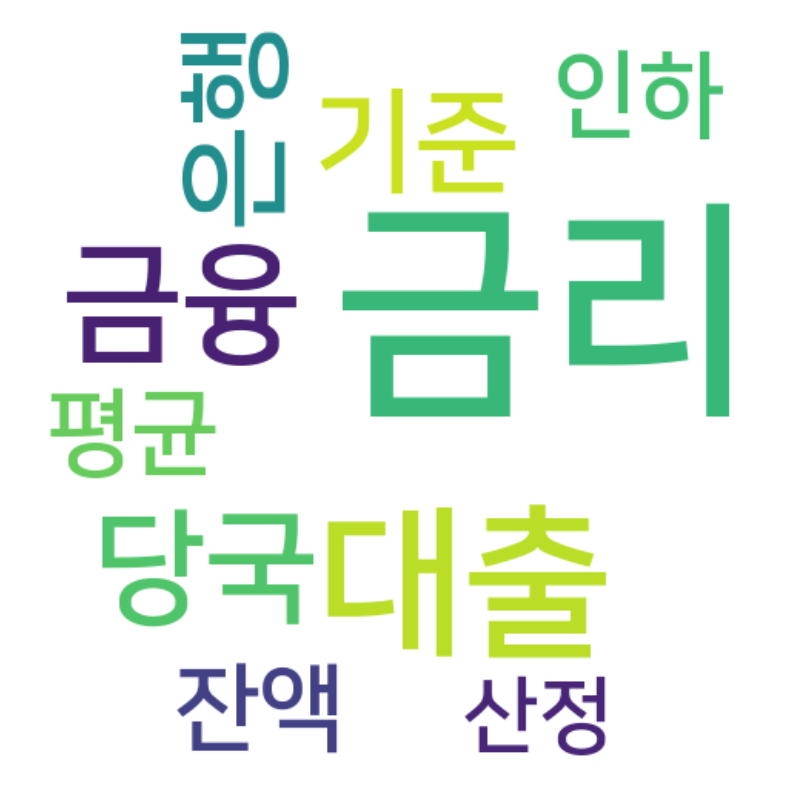

In [28]:
# 워드클라우드 생성 및 파일 저장
# 옵션 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
background_color = 'white'
margin = 10
min_font_size = 10
max_font_size = 150
width = 500
height = 500

wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin,
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# **실전 텍스트 분석: LDA토픽모델링, 감성분석**

## **1. LDA토픽모델링: 단어를 문서에 포함된 주제 단위로 군집화**

In [29]:
# 기사 본문을 저장할 리스트
article_list = []

file_path = "/content/article_sample.txt"

f = open(file_path, encoding='utf-8')
for line in f:
  col = line.strip().split('\t')
  # 기사의 본문만 저장
  content = col[4]
  article_list.append(content)
f.close()

print('총 기사 수:', len(article_list))

총 기사 수: 100


In [31]:
print('기사 샘플:')
print(article_list[3][:1000])

기사 샘플:
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

### 1.2. 기사 문장을 형태소 단위로 분리하기

In [32]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

text = '꼬꼬마 형태소 분석기를 불러옵니다.'
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [33]:
# 형태소 분석 후 기사 단위 형태소 리스트를 저장할 리스트
tag_sentence_list = []

# 불용어 리스트
stop_list = ['카페', '카페규정']

# 형태소 중 꼭 포함해야 하는 형태소 태그
pos_list = ['NNG', 'NNP']

now = 0
for article in article_list:
  now += 1
  print(now, end='\r')
  sentence_list = kkma.sentences(article)
  tag_sentence = []
  for sentence in sentence_list:
    tag_list = kkma.pos(sentence)
    for word, pos in tag_list:
      if (pos in pos_list) and (word not in stop_list) and (len(word)>1):
        tag_sentence.append(word)
  tag_sentence_list.append(tag_sentence)

### 1.3. LDA토픽모델링 수행하기

In [35]:
# 텍스트 분석을 위한 gensim 패키지
import gensim
from gensim import corpora

# LDA토픽모델링 수행 중에는 진행 중인 상황에 대한 로그 출력됨
# 아래는 로그 출력 X 옵션 설정하는 코드
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [38]:
# 추출할 토픽 개수 지정
topic = 3
# 각 토픽에 포함할 키워드(단어) 개수 지정
keyword = 10

# LDA토픽모델링 수행
dictionary = corpora.Dictionary(tag_sentence_list) # gensim의 Dictionary 객체 생성
corpus = [dictionary.doc2bow(text) for text in tag_sentence_list]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word=dictionary, passes=10)

# 추출된 토픽과 토픽에 포함된 키워드를 저장할 리스트 생성
topic_list = []

# 추출된 토픽을 리스트에 저장
for num in range(topic):
  topic_list.append(ldamodel.show_topic(num, keyword))

- `Dictionary`: 텍스트 데이터에 등장하는 모든 단어에 고유 ID 부여한 딕셔너리
- corpus: 원시 텍스트 데이터를 수치 데이터로 변환한 형태의 문서 집합
  - `len(corpus)`=100
  - 각 element는 (ID, count)로 구성
- `doc2bow()`: BOW 형식으로 문서 변환
- `passes` 하이퍼파라미터: 모델 학습 반복 횟수
- `show_topic()`: 가장 중요한 키워드와 중요도(확률) 반환
  - num: 추출할 토픽 index
  - keyword: 추출할 키워드 개수

In [39]:
# 추출된 토픽 출력
for index in range(len(topic_list)):
  print("# 주제", index+1)
  for topic in topic_list[index]:
    print('\t', topic[0].split('/')[0])

# 주제 1
	 비트
	 화폐
	 금융
	 암호
	 자산
	 거래
	 체인
	 달러
	 블록
	 시장
# 주제 2
	 부동산
	 금융
	 그림자
	 신탁
	 투자
	 대출
	 시장
	 관련
	 규모
	 자산
# 주제 3
	 금리
	 대출
	 금융
	 은행
	 기준
	 당국
	 인하
	 잔액
	 산정
	 가산


### 1.4. LDA토픽모델링 결과 시각화하기

- pyLDAvis: LDA 모델의 결과를 interactive하게 시각화
- 토픽 간의 거리, 단어 중요도 등을 시각적으로 표현

In [45]:
# LDA토픽모델링 결과를 시각화하는 pyLDAvis 패키지
import pyLDAvis.gensim

# 시각화 결과 출력
pyLDAvis.enable_notebook() # 노트북 내에 출력(그렇지 않으면 외부 창에 나타날 수도 있음)
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=True) # 시각화에 필요한 객체로 변환
pyLDAvis.display(lda_display)

- **Intertopic Distance Map**: 토픽 간의 거리 시각화
  - 토픽 간 원이 겹치면 유사한 주제를 다루고 있을 가능성이 있음
  - 서로 멀리 떨어진 원일수록 다른 주제를 잘 구분

  => 그래프의 분포를 확인하며 토픽의 개수 조정하기

## **2. 감성분석: 문장의 감성수준을 수치로 표현**

### 2.1. 샘플 데이터 불러오기

In [47]:
# 영화 리뷰를 저장할 리스트
review_list = []

file_path = "/content/review_sample.txt"

f = open(file_path, encoding='utf-8')
for line in f:
  review_text = line.strip()
  review_list.append(review_text)
f.close()

print('총 리뷰 수:', len(review_list))

총 리뷰 수: 1000


In [48]:
print('리뷰 샘플:')
print(review_list[10])

리뷰 샘플:
이게 마지막이라고?? 정말?? 이렇게 끝낸다고??


### 2.2. 리뷰 문장을 형태소 단위로 분리하기

In [49]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

text = '꼬꼬마 형태소 분석기를 불러옵니다.'
print(kkma.pos(text))

[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [50]:
# 형태소 분석 후 리뷰 단위 형태소 리스트를 저장할 리스트
tag_sentence_list = []

# 불용어 리스트
stop_list = ['카페', '카페규정']

now = 0
for review in review_list:
  now += 1
  print(now, end='\r')
  tag_list = kkma.pos(review)
  tag_sentence = []
  for word, pos in tag_list:
      tag_sentence.append(word + '/' + pos)
  tag_sentence_list.append(tag_sentence)

In [51]:
print('리뷰 형태소 분석 샘플:')
print('- 원문:', review_list[10])
print('- 결과:', tag_sentence_list[10])

리뷰 형태소 분석 샘플:
- 원문: 이게 마지막이라고?? 정말?? 이렇게 끝낸다고??
- 결과: ['이것/NP', '이/JKS', '마지막/NNG', '이/VCP', '라고/ECD', '??/SW', '정말/MAG', '??/SW', '이렇/VA', '게/ECD', '끝내/VV', 'ㄴ다고/ECE', '??/SW']


### 2.3. 감성사전 불러오기
- 활용할 감성사전: KOSAC(Korean Sentiment Analysis Corpus)
  - 해당 노트북에서는 파일을 활용
  - 감성사전 다운로드 URL : http://word.snu.ac.kr/kosac/lexicon.php

In [52]:
# KOSAC 감성사전 내용 살펴보기
f = open('./polarity.csv', encoding='utf-8')
for line in f.read().split('\n')[:10]:
  line = line.strip().split(',')
  print(line)
f.close()

['ngram', 'freq', 'COMP', 'NEG', 'NEUT', 'None', 'POS', 'max.value', 'max.prop']
['가*/JKS', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/JKS;있/VV', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/JKS;있/VV;었/EP', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가*/VV', '3', '0', '0', '0', '0', '1', 'POS', '1']
['가*/VV;ㄴ다*/EF', '1', '0', '0', '0', '0', '1', 'POS', '1']
['가/JKC', '17', '0', '0.470588235', '0.235294118', '0', '0.294117647', 'NEG', '0.470588235']
['가/JKC;되/VV', '11', '0', '0.363636364', '0.272727273', '0', '0.363636364', 'NEG', '0.363636364']
['가/JKC;되/VV;ㄴ/ETM', '2', '0', '0', '1', '0', '0', 'NEUT', '1']
['가/JKC;되/VV;ㄹ/ETM', '1', '0', '0', '1', '0', '0', 'NEUT', '1']


In [54]:
# KOSAC 감성사전을 딕셔너리에 저장
# 원본 사전에서 ';'으로 구분된 형태소 -> 띄어쓰기 단위로 변형하여 딕셔너리의 key로 활용

# 사전을 저장할 딕셔너리
sentiment = {}

f = open('./polarity.csv', encoding='utf-8')
for line in f:
  col = line.strip().split(',')
  pos = col[0]
  polarity = col[7]
  score = col[8]
  # 극성==POS -> (+), 극성==NEG -> (-) 곱해서 score 계산
  if polarity == 'POS':
    score = float(score)
  elif polarity == 'NEG':
    score = -float(score)
  else:
    # 긍정, 부정인 경우만 취급
    continue
  # ';'을 띄어쓰기로 바꿔 딕셔너리에 스코어와 함께 저장
  sentiment[pos.replace(';', " ")] = score

f.close()

In [55]:
# 딕셔너리 샘플 출력

# 긍정
print("(긍정) 솜씨/NNG 는/JX 능숙/XR :", sentiment["솜씨/NNG 는/JX 능숙/XR"])
print("(긍정) 자연/NNG 스럽/XSA :", sentiment["자연/NNG 스럽/XSA"])
print("(긍정) 획일/XR 성/XSN 의/JKG :", sentiment["획일/XR 성/XSN 의/JKG"])
print("(긍정) 훨씬/MAG 안전/NNG :", sentiment["훨씬/MAG 안전/NNG"])
# 부정
print("(부정) 뒷맛/NNG 이/JKS 씁쓸/XR :", sentiment["뒷맛/NNG 이/JKS 씁쓸/XR"])
print("(부정) 손해/NNG 배상/NNG 을/JKO :", sentiment["손해/NNG 배상/NNG 을/JKO"])
print("(부정) 에서/JKB 욕/NNG 튀어나오/VV :", sentiment["에서/JKB 욕/NNG 튀어나오/VV"])
print("(부정) 유달리/MAG 난해/XR :", sentiment["유달리/MAG 난해/XR"])

(긍정) 솜씨/NNG 는/JX 능숙/XR : 1.0
(긍정) 자연/NNG 스럽/XSA : 1.0
(긍정) 획일/XR 성/XSN 의/JKG : 1.0
(긍정) 훨씬/MAG 안전/NNG : 1.0
(부정) 뒷맛/NNG 이/JKS 씁쓸/XR : -1.0
(부정) 손해/NNG 배상/NNG 을/JKO : -1.0
(부정) 에서/JKB 욕/NNG 튀어나오/VV : -1.0
(부정) 유달리/MAG 난해/XR : -1.0


### 2.4. 리뷰 감성스코어 계산하기

In [59]:
# 감성분석 결과를 각각 긍정과 부정 리뷰로 저장할 리스트
positive_sentence = []
negative_sentence = []

for tag_sentence, review in zip(tag_sentence_list, review_list):
  # score 초기화
  score = 0.0
  # 형태소 분석된 문장 안에서 최대 7개까지 결합된 형태소가 감성사전 안에 있는지 확인
  for i in range(len(tag_sentence)):
    max_n = 7
    for n in range(max_n):
      ngram = ""
      for j in range(len(tag_sentence) - n):
        ngram += " " + tag_sentence[j]
      ngram = ngram.strip()
      if ngram in sentiment.keys():
        score += sentiment[ngram]
  # 감성스코어로 긍정/부정을 판단하기 위한 임계값 지정
  limit = 0
  if score > limit:
    positive_sentence.append(['POSITIVE', str(review)])
  elif score < -limit:
    negative_sentence.append(['NEGATIVE', str(review)])

# 감성분석 결과를 감성스코어 기준으로 정렬
positive_sentence.sort(reverse=True)
negative_sentence.sort()

### 2.5. 리뷰 감성분석 결과 확인
- KOSAC 감성사전은 표준어를 바탕으로 제작됨
  - 온라인 리뷰 특성상 문법 오류가 많기 때문에 사전과의 매칭률이 낮을 수 있음
- KOSAC 감성사전의 형태소 태깅과 꼬꼬마 형태소 분석기의 형태소 태깅 결과의 차이도 영향을 미침
- 직접 분석하려는 텍스트의 도메인에 맞는 사전을 추가하여 정확도를 높일 수 있음

In [60]:
print('긍정 판별 문장 개수:', len(positive_sentence))
positive_sentence[:10]

긍정 판별 문장 개수: 27


[['POSITIVE', '흥미진진 마지막액션씬최고'],
 ['POSITIVE', '하루빨리 통합마블 되기를'],
 ['POSITIVE', '최고최고최고최고최고!'],
 ['POSITIVE', '최고ㅜㅜ 레이븐ㅠㅠㅠ'],
 ['POSITIVE', '장난합니까 마지막 영환데'],
 ['POSITIVE', '은혜를 모르는 진 그레이..'],
 ['POSITIVE', '영화보는데 기빨린다 후하'],
 ['POSITIVE', '영화를 만들다 말았어...'],
 ['POSITIVE', '아주 재밌습니다 후회없음'],
 ['POSITIVE', '생각보다 많이 괜찮은 영화']]

In [61]:
print('부정 판별 문장 개수:', len(negative_sentence))
negative_sentence[:10]

부정 판별 문장 개수: 13


[['NEGATIVE', '계속 생각 나는 영화. ㅠㅠ'],
 ['NEGATIVE', '그냥 개똥보다 못한 영화'],
 ['NEGATIVE', '난재밌었어요....'],
 ['NEGATIVE', '내 개인 평점 7.2..;;'],
 ['NEGATIVE', '말이 필요없습니다. 재미있어요'],
 ['NEGATIVE', '스토리 너무 늘어지는듯'],
 ['NEGATIVE', '스토리가 왜이리 이상하냐'],
 ['NEGATIVE', '아쉬움가득안고떠납니다'],
 ['NEGATIVE', '아쉽지만 행복했습니다'],
 ['NEGATIVE', '왜 엑스우먼이 아닌지ㅎ']]